In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the Data

In [3]:
train= pd.read_csv('train.csv')
item = pd.read_csv('item_data.csv')
campaign = pd.read_csv('campaign_data.csv')
coupon = pd.read_csv('coupon_item_mapping.csv')
demograph = pd.read_csv('customer_demographics.csv')
transaction = pd.read_csv('customer_transaction_data.csv')

# EDA

## train data

In [4]:
# train data
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [5]:
train.shape

(78369, 5)

In [6]:
train.nunique()

id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
dtype: int64

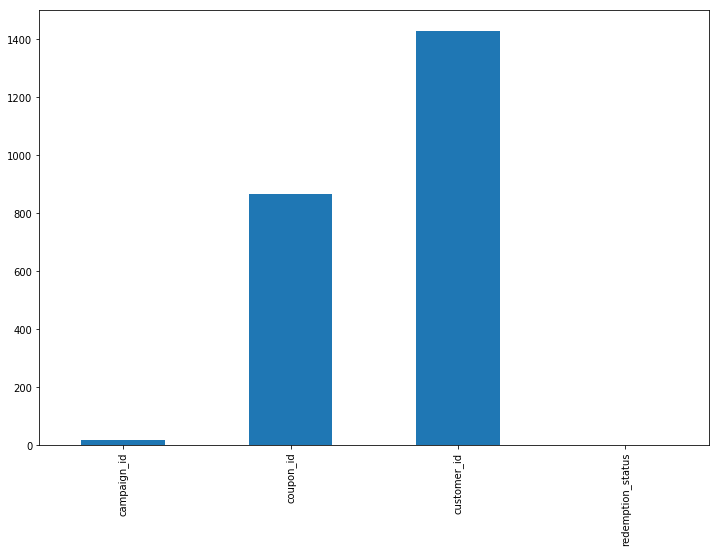

In [7]:
train.drop('id',axis=1).nunique().plot(kind='bar',figsize=(12,8))
plt.show()

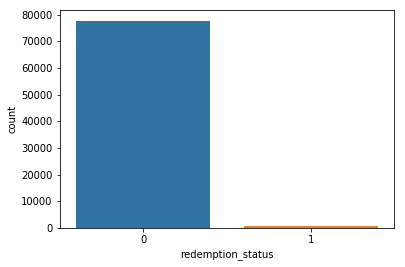

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64


In [8]:
sns.countplot(train.redemption_status)
plt.show()
print(train.redemption_status.value_counts()/78369*100)

In [9]:
# no missing data

## item data

In [10]:
# item data
item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [11]:
item.shape

(74066, 4)

In [12]:
# check for missing values
item.isnull().sum()

item_id       0
brand         0
brand_type    0
category      0
dtype: int64

In [13]:
# checking unique values
item.nunique()

item_id       74066
brand          5528
brand_type        2
category         19
dtype: int64

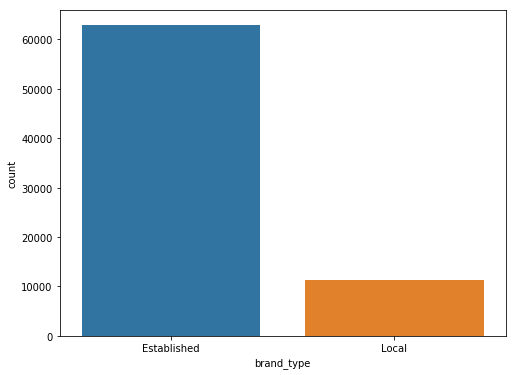

Established    62842
Local          11224
Name: brand_type, dtype: int64


In [14]:
plt.figure(figsize=(8,6))
sns.countplot(item.brand_type)
plt.show()
print(item.brand_type.value_counts())

#### Almost 85% brands are Established and 15% brand are Local.

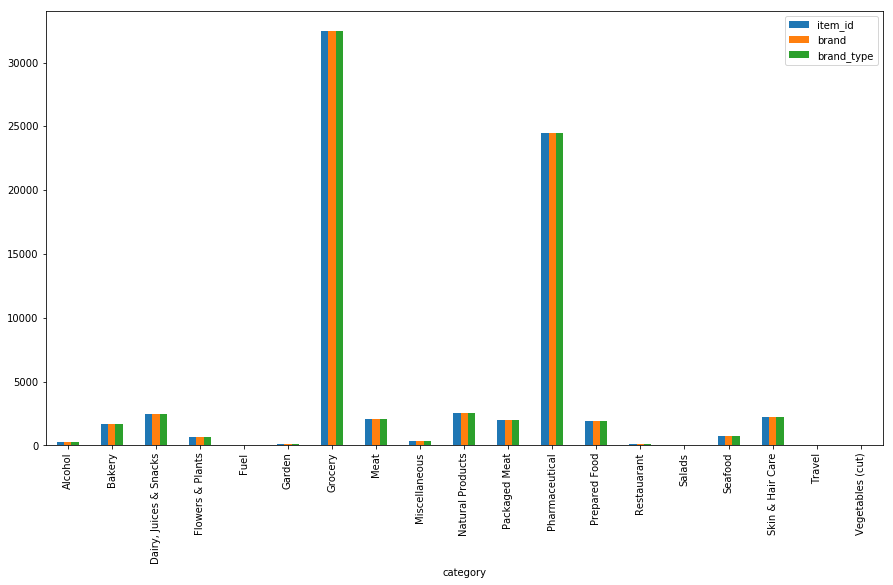

In [15]:
item.groupby('category').count().plot(kind='bar', figsize=(15,8)) 
plt.show()

In [16]:
# Grocery and pharmaceutical are the major categories w.r.t item and brand.

## Campaign data

In [17]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [18]:
campaign.shape

(28, 4)

In [19]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 976.0+ bytes


In [20]:
# check for missing values
campaign.isnull().sum()

campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64

In [21]:
# Coverting date to DateTime object
campaign['start_date'] = pd.to_datetime(campaign['start_date'], dayfirst=True)
campaign['end_date'] = pd.to_datetime(campaign['end_date'], dayfirst=True)

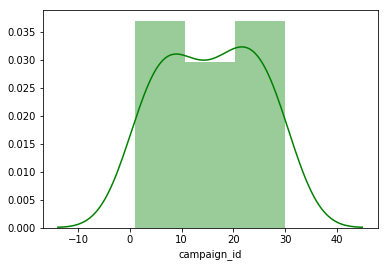

In [22]:
sns.distplot(campaign.campaign_id, color='g')
plt.show()

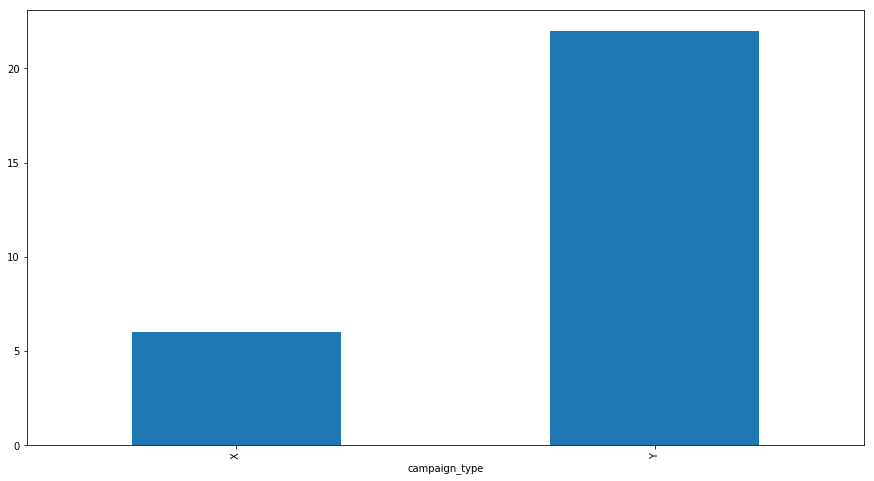

In [23]:
campaign.groupby('campaign_type')['campaign_id'].count().plot(kind='bar', figsize=(15,8))
plt.show()

In [24]:
campaign['duration'] = abs((campaign['end_date'] -  campaign['start_date']).dt.days)

In [25]:
campaign['quarter'] = campaign.start_date.dt.quarter

In [26]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date,duration,quarter
0,24,Y,2013-10-21,2013-12-20,60,4
1,25,Y,2013-10-21,2013-11-22,32,4
2,20,Y,2013-09-07,2013-11-16,70,3
3,23,Y,2013-10-08,2013-11-15,38,4
4,21,Y,2013-09-16,2013-10-18,32,3


In [27]:
campaign.quarter.value_counts()

3    10
4     8
1     6
2     4
Name: quarter, dtype: int64

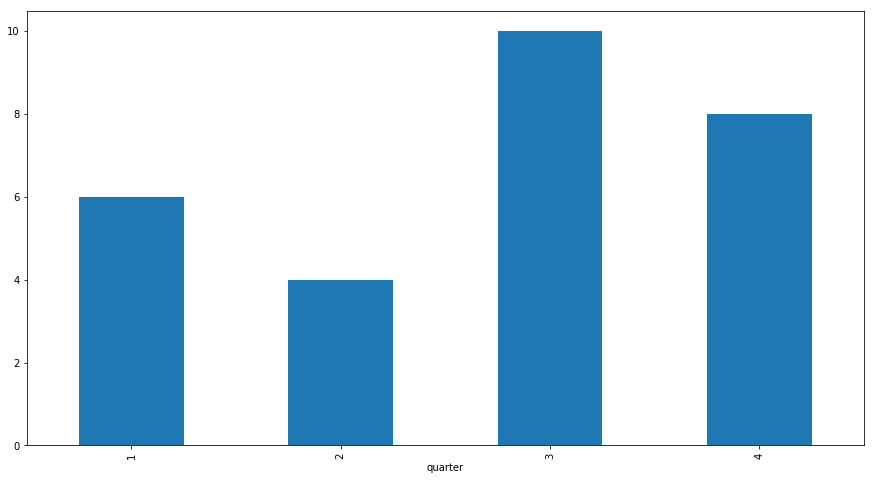

In [28]:
campaign.groupby('quarter')['campaign_id'].count().plot(kind='bar', figsize=(15,8))
plt.show()

#### Most campaigns have been lauched in Q3 and Q4

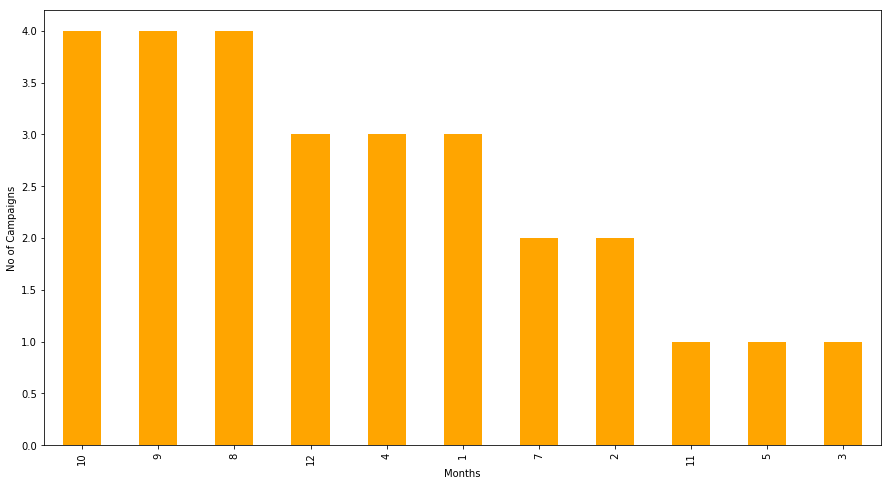

In [29]:
campaign.start_date.dt.month.value_counts().plot(kind='bar', figsize=(15,8),color='Orange')
plt.xlabel('Months')
plt.ylabel('No of Campaigns')
plt.show()

#### these Campaigns are generally focused on Festivals and some Special holidays
#### Agust -> Independence Day
#### September -> Ganesh chaturthi Ganpati Bappa Morya)
#### October -> Dussera and Diwali
#### Jan  -> Republic day

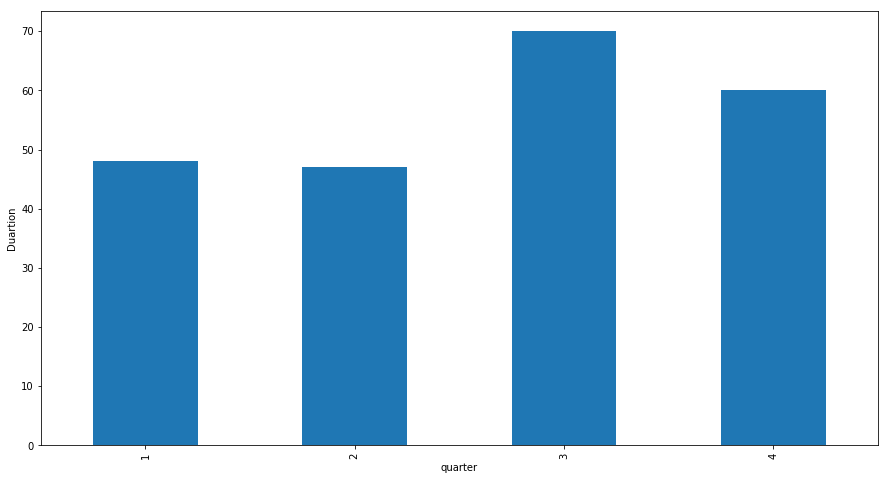

In [30]:
campaign.groupby('quarter')['duration'].max().plot(kind='bar', figsize=(15,8))
plt.ylabel('Duartion')
plt.show()

## Coupon Item Mapping

In [31]:
coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [32]:
coupon.shape

(92663, 2)

In [33]:
# check for missing values
coupon.isnull().sum()

coupon_id    0
item_id      0
dtype: int64

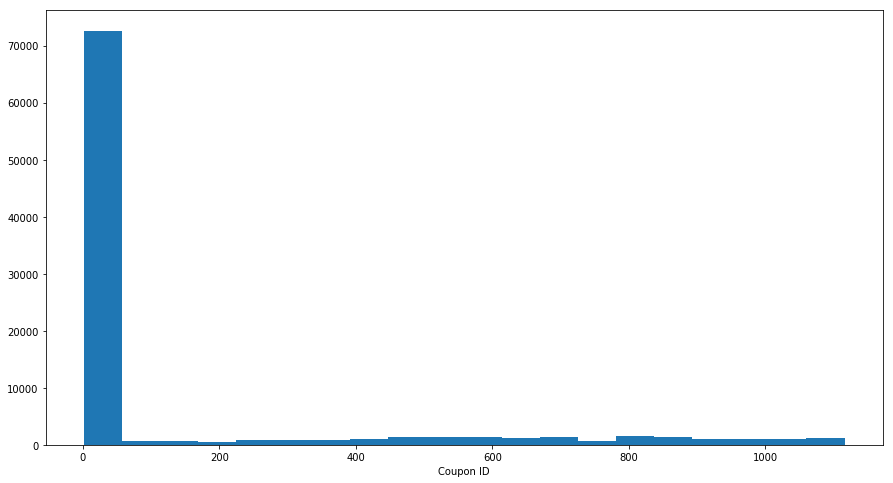

In [34]:
plt.figure(figsize=(15,8))
plt.hist(coupon.coupon_id, bins=20)
plt.xlabel('Coupon ID')
plt.show()

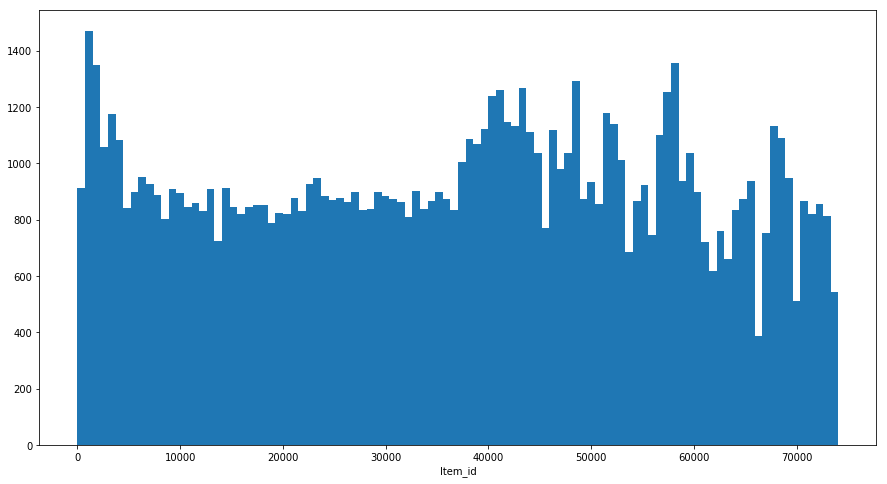

In [35]:
plt.figure(figsize=(15,8))
plt.hist(coupon.item_id, bins=100)
plt.xlabel('Item_id')
plt.show()

## Custumer Demographics

In [36]:
demograph.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [37]:
demograph.shape

(760, 7)

In [38]:
demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.6+ KB


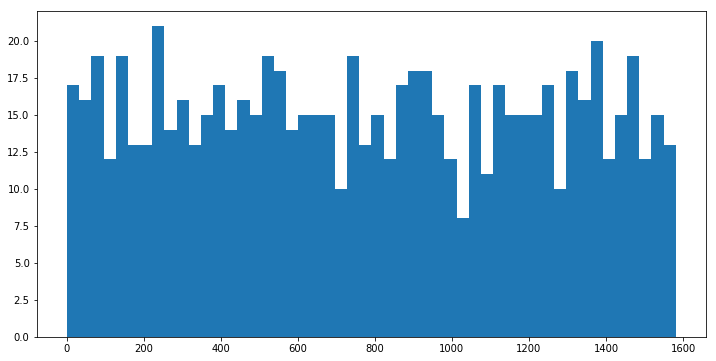

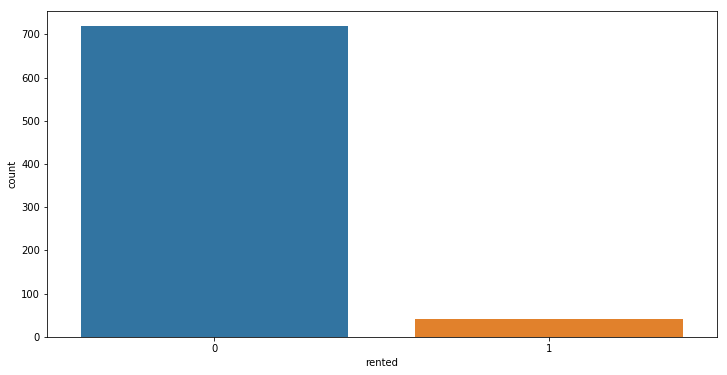

0    94.605263
1     5.394737
Name: rented, dtype: float64


In [39]:
plt.figure(figsize=(12,6))
plt.hist(demograph.customer_id,bins=50)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(demograph.rented)
plt.show()
print(demograph.rented.value_counts()/760*100)

#### most custumers have their own houses(almost 95%)

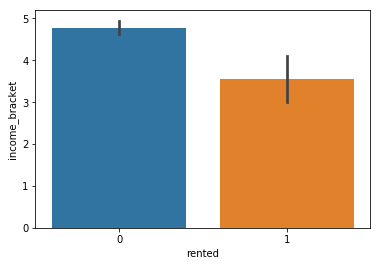

In [40]:
# rented wrt income bracket
sns.barplot(demograph.rented, demograph.income_bracket)
plt.show()

In [41]:
def replace5(x):
    if x=='5+':
        return '5'
    else:
        return x

In [42]:
demograph['family_size'] = demograph['family_size'].apply(replace5)

In [43]:
demograph[['family_size']] = demograph[['family_size']].apply(pd.to_numeric)

In [44]:
demograph.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [45]:
demograph[(demograph.family_size==0) & (demograph.marital_status=='Single')].count()

customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

In [46]:
demograph.isnull().sum()/760*100

customer_id        0.000000
age_range          0.000000
marital_status    43.289474
rented             0.000000
family_size        0.000000
no_of_children    70.789474
income_bracket     0.000000
dtype: float64

In [47]:
demograph.no_of_children.value_counts()

1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [48]:
def replace3(x):
    if x=='3+':
        return '3'
    else:
        return x

In [49]:
demograph['no_of_children'] = demograph['no_of_children'].apply(replace3)

In [50]:
demograph[['no_of_children']] = demograph[['no_of_children']].apply(pd.to_numeric)

In [51]:
def child(x):
    for i in demograph['no_of_children'].isna():
        if i ==True:
            if x==1:
                return 0
            elif x==2:
                return 1
            else:
                return 2

In [52]:
demograph['no_of_children'] = demograph['family_size'].apply(child)

In [53]:
demograph.no_of_children.value_counts()

1    303
0    248
2    209
Name: no_of_children, dtype: int64

In [54]:
def marital_status(x):
    for i in demograph['marital_status'].isna():
        if i ==True:
            if x>=2:
                return 'Married'
            else:
                return 'Single'

In [55]:
demograph['marital_status'] = demograph['family_size'].apply(marital_status)

In [56]:
demograph.marital_status.value_counts()

Married    512
Single     248
Name: marital_status, dtype: int64

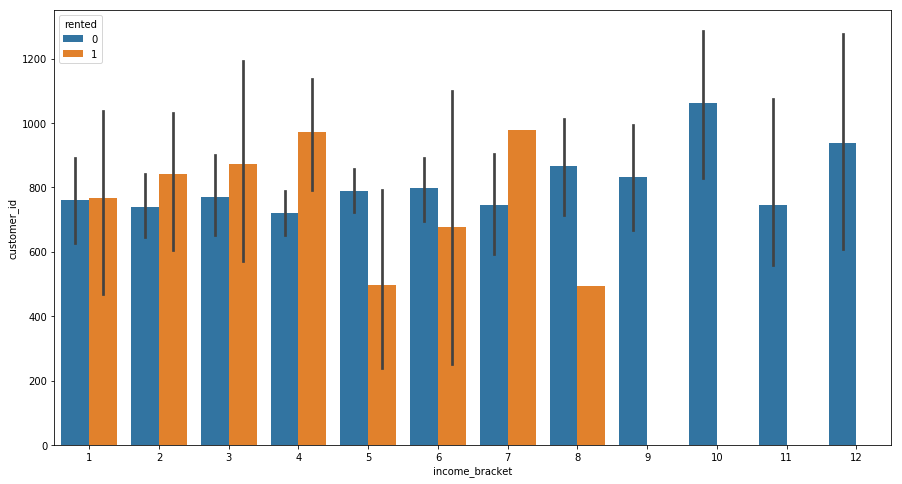

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(demograph.income_bracket, demograph.customer_id, hue='rented', data=demograph)
plt.show()

#### person earning more income has their own house or prefer to buy house

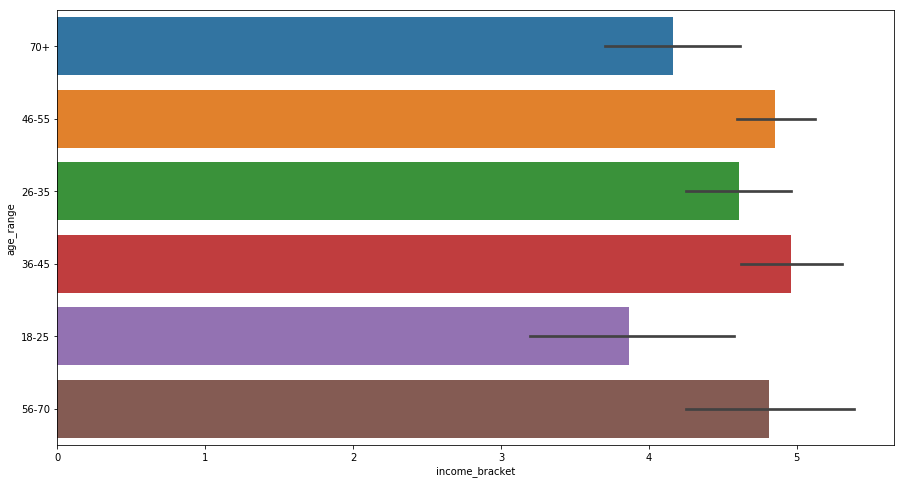

In [58]:
plt.figure(figsize=(15,8))
sns.barplot(demograph.income_bracket, demograph.age_range, data=demograph)
plt.show()

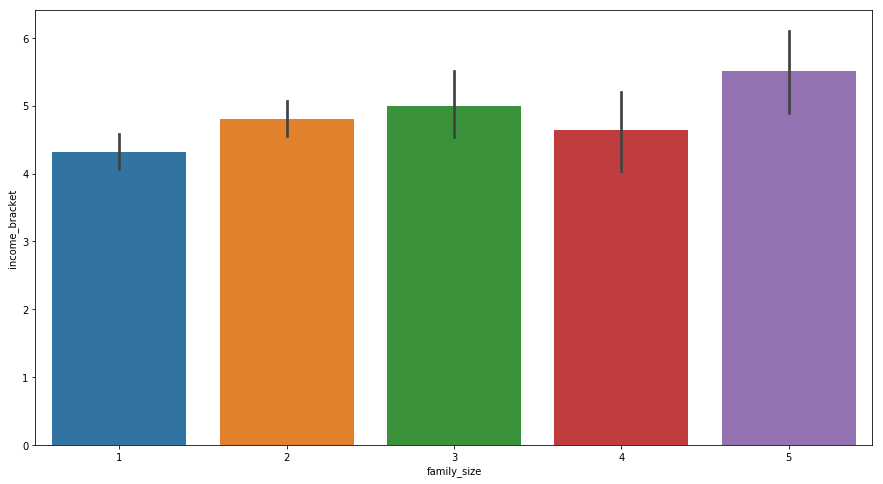

In [59]:
plt.figure(figsize=(15,8))
sns.barplot(demograph.family_size, demograph.income_bracket, data=demograph)
plt.show()

#### family size has impact on income

## Custumer Transaction

In [60]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [61]:
transaction.shape

(1324566, 7)

In [62]:
transaction.nunique()

date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
dtype: int64

In [63]:
# checking for missing values
transaction.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [64]:
# total_price(new column)
transaction['total_price'] = transaction['selling_price'] +\
abs(transaction['other_discount']) + transaction['coupon_discount']

In [65]:
# Coverting date to DateTime object
transaction['date'] = pd.to_datetime(transaction['date'], dayfirst=True)


In [66]:
transaction.dtypes

date               datetime64[ns]
customer_id                 int64
item_id                     int64
quantity                    int64
selling_price             float64
other_discount            float64
coupon_discount           float64
total_price               float64
dtype: object

In [67]:
#transaction['day']= transaction.date.dt.day

In [68]:
#transaction['month']= transaction.date.dt.month

In [69]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,total_price
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,45.95
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,67.32
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,120.75
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,67.32
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,99.38


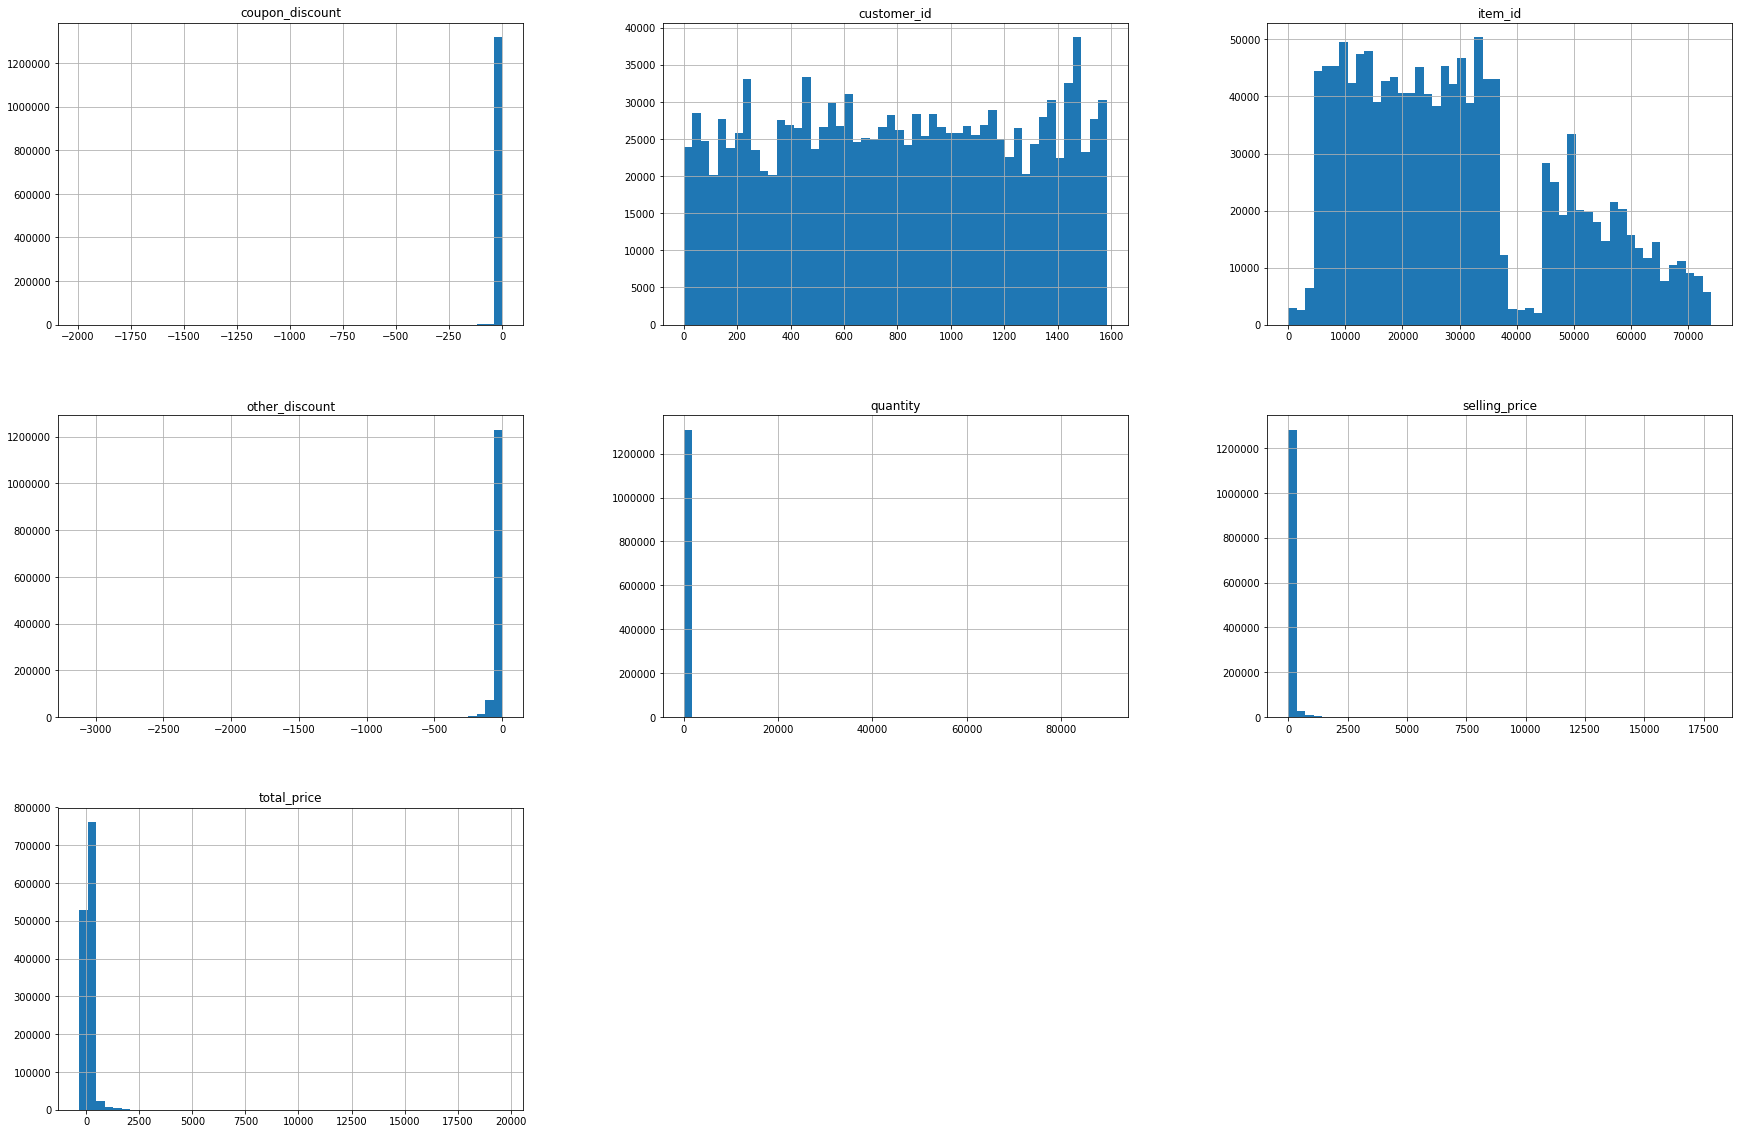

In [73]:
transaction.hist(bins=50, figsize=(30,20))
plt.show()

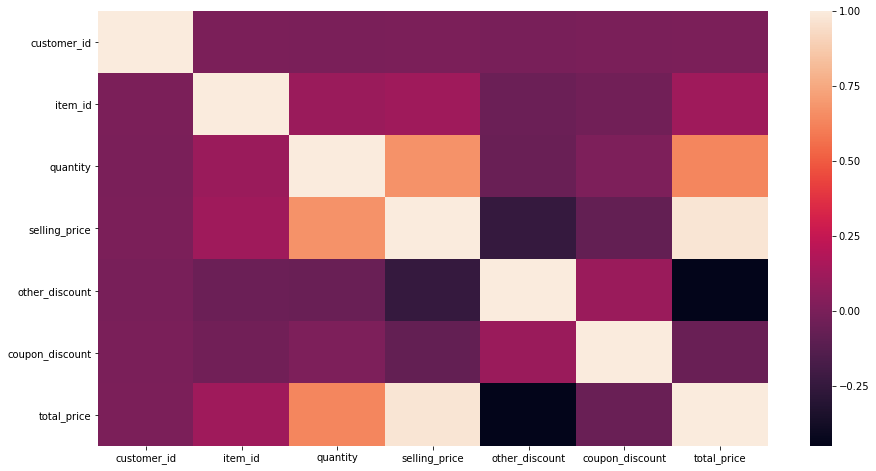

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(transaction.corr())
plt.show()